In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
games = pd.read_csv('vgsales.csv')

In [ ]:
# Verify data was pulled in successfully.
games

In [ ]:
# Check datatypes for the columns.
games.info()

In [ ]:
games.Year.isnull().sum()

## Takeaways
* The 'Year' column has missing values, so I will have to drop the missing values before converting to and integer datatype.
* I will also drop missing values from all other columns as well.

In [ ]:
# Drop missing values.
games.dropna(inplace=True)

In [ ]:
games.info()

In [ ]:
# Convert 'Year' column into integer datatype.
games.Year = games.Year.astype(int)

In [ ]:
# Verify change.
games.info()

In [ ]:
# Lowercase all columns.
columns = [col.lower() for col in games.columns]
games.columns = columns

In [ ]:
# Drop all observations where global sales are less than one million.
games = games[games.global_sales > 1.0]

In [ ]:
# Create a dataframe for the games that sold less than a million copies globally.
low_sales = games[games.global_sales < 1.0]

In [ ]:
# Take a peek at the different platforms that produced a game/games that sold over one million globally.
games.platform.value_counts()

In [ ]:
games

# Takeaways
* I have the dataframe in a state where I am ready to begin Exploratory Data Analysis.
* My target variable will be 'na_sales'.
* I will have to drop 'global_sales' to prevent data leakage.

In [2]:
# Create a function that will acquire the data and prepare it for Exploratory Data Analysis
def acquire_and_prep():
    games = pd.read_csv('vgsales.csv')
    # Drop missing values.
    games.dropna(inplace=True)
    # Convert 'Year' column into integer datatype.
    games.Year = games.Year.astype(int)
    # Lowercase all columns.
    columns = [col.lower() for col in games.columns]
    games.columns = columns
    # Drop all observations where global sales are less than one million.
    games = games[games.global_sales > 1.0]
    return games

In [3]:
games = acquire_and_prep()

In [71]:
# Create a column that gives the age of the game as opposed to the year it was released.
games['age'] = 2022 - games.year

In [73]:
# Create a column that combines all sales outside of North America
games['combined_sales'] = games.eu_sales + games.jp_sales + games.other_sales

In [74]:
games

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,16,41.25
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,37,11.16
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,14,19.98
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,13,17.25
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,26,20.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,2051,Oshare Majo Love and Berry: DS Collection,DS,2006,Misc,Sega,0.00,0.00,1.01,0.00,1.01,16,1.01
2050,2052,Monster Rancher,PS,1997,Simulation,Tecmo Koei,0.12,0.08,0.74,0.07,1.01,25,0.89
2051,2053,The LEGO Movie Videogame,PS3,2014,Action,Warner Bros. Interactive Entertainment,0.33,0.48,0.02,0.18,1.01,8,0.68
2052,2054,DiRT 2,PS3,2009,Racing,Codemasters,0.27,0.53,0.00,0.20,1.01,13,0.73


# Visualize Distributions

In [75]:
games.dtypes

rank                int64
name               object
platform           object
year                int64
genre              object
publisher          object
na_sales          float64
eu_sales          float64
jp_sales          float64
other_sales       float64
global_sales      float64
age                 int64
combined_sales    float64
dtype: object

### Loop through the quantitative values and show the distribution of each on a separate subplot.

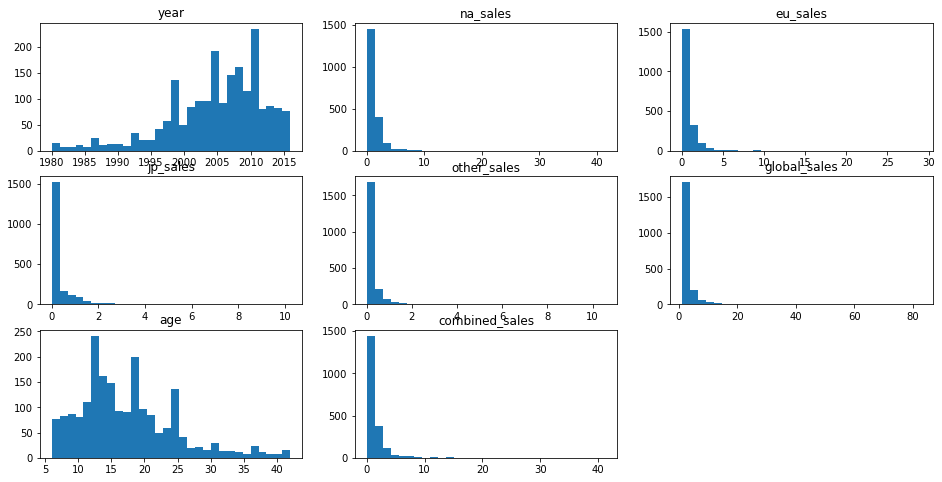

In [80]:
plt.figure(figsize=(16,8))

for i, col in enumerate(quantitative_values[1:]):
    plot_number = i + 1
    plt.subplot(3,3,plot_number)
    plt.title(col)
    games[col].hist(bins = 30)
    plt.grid(False)

# Takeaways
* 'year' seems to be the only feature that is normaly(ish) distributed.
* All other features are right skewed.

### Loop through the qualitative values and show the distribution of each on a separate subplot.

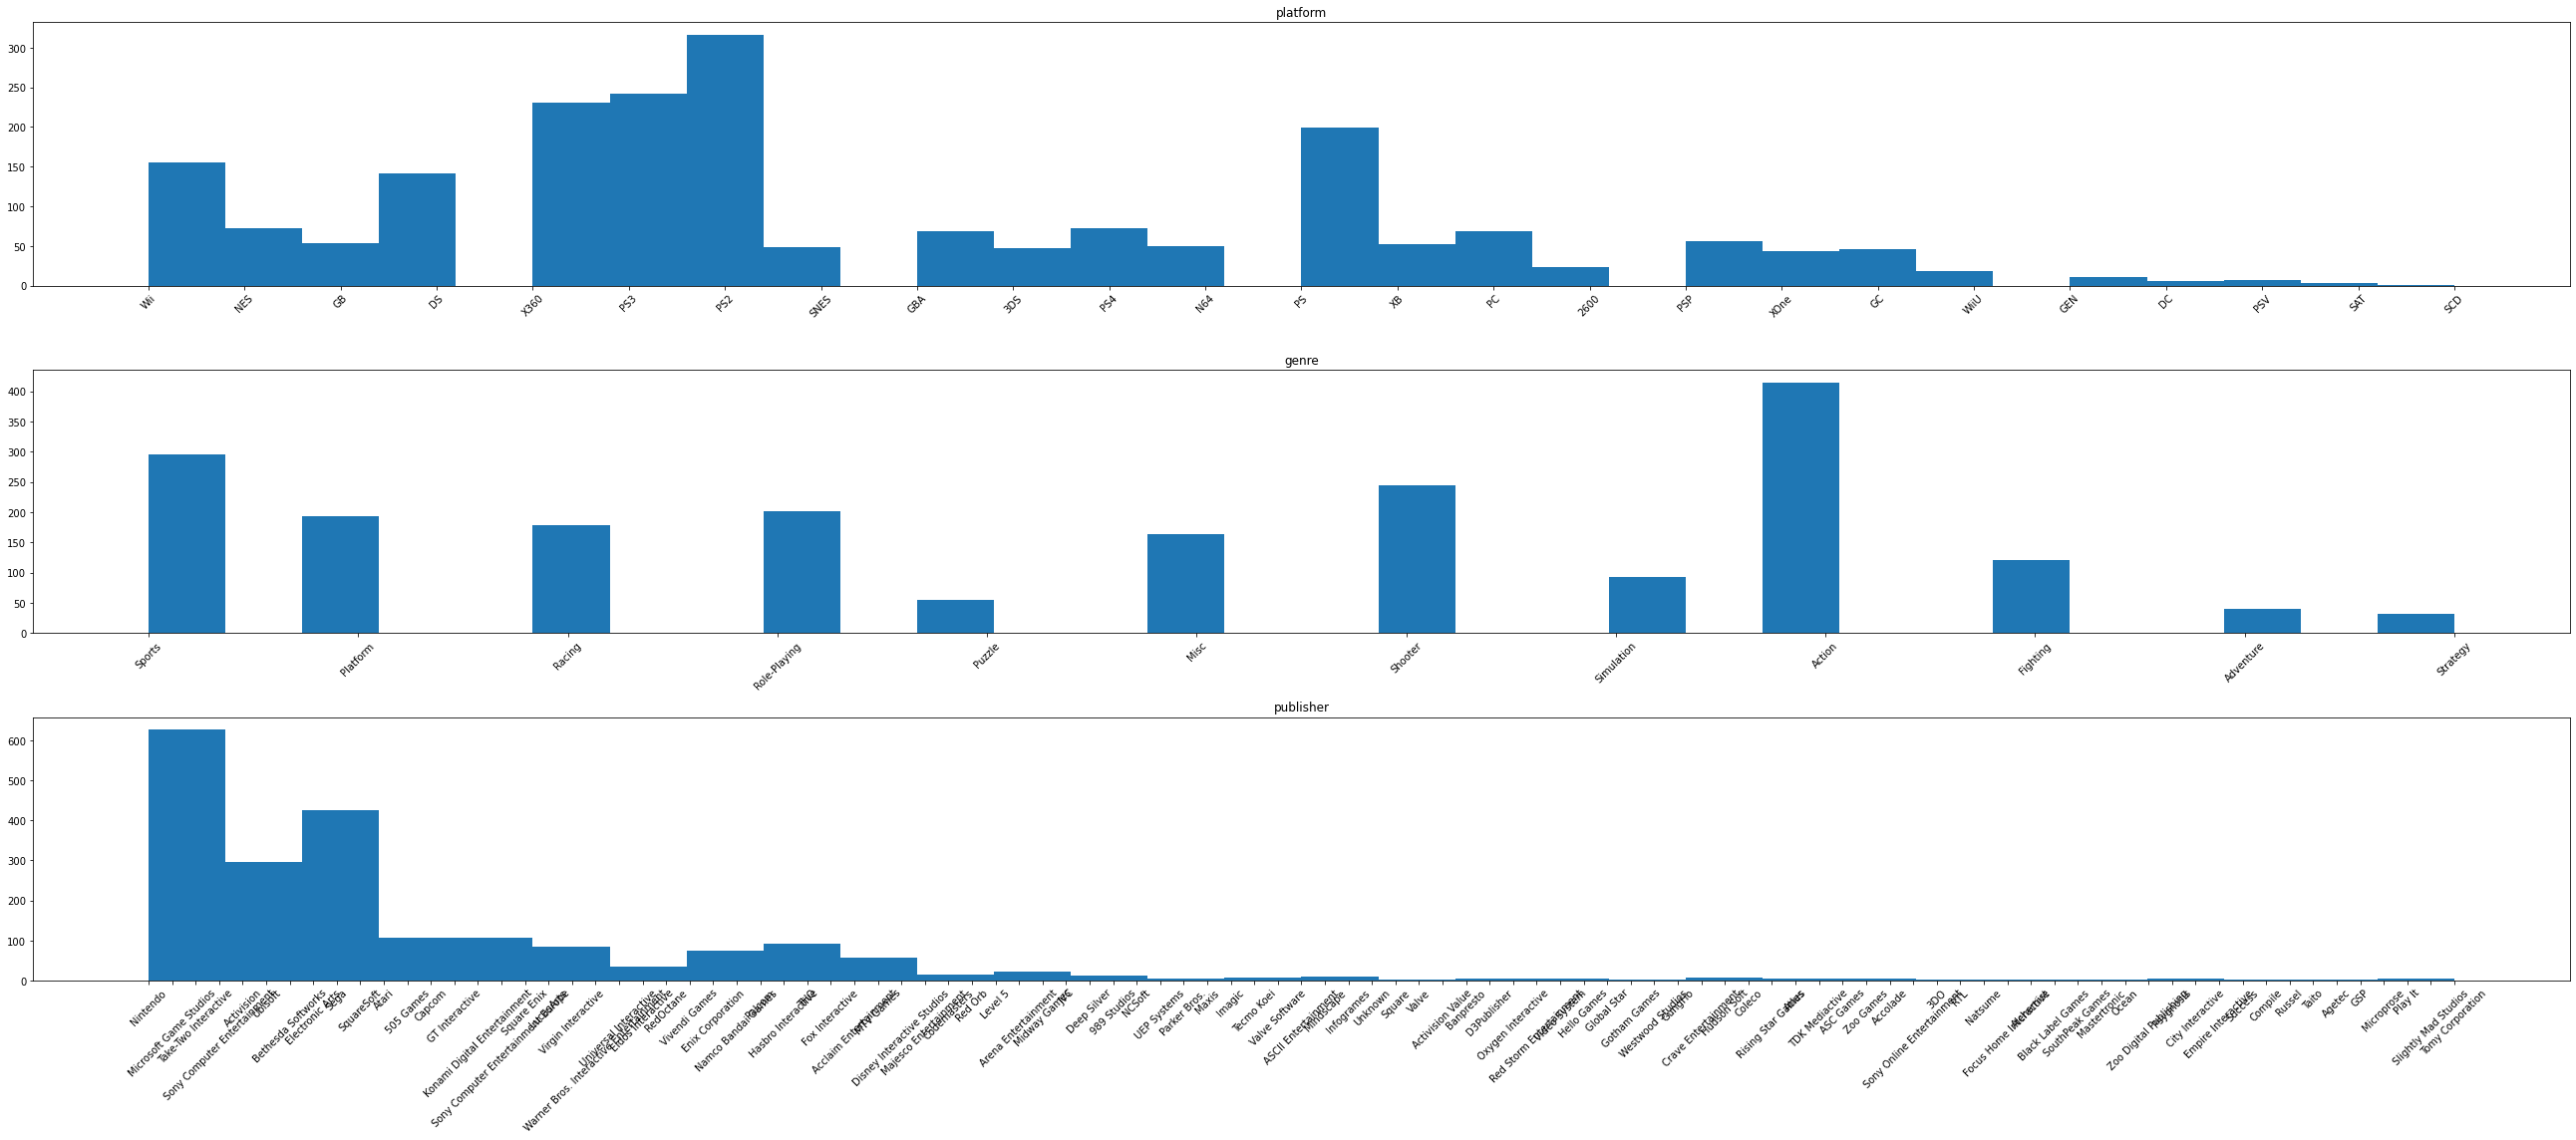

In [49]:
plt.figure(figsize=(36,16))

for i, col in enumerate(qualitative_values[1:]):
    plot_number = i + 1
    plt.subplot(3,1,plot_number)
    plt.title(col)
    games[col].hist(bins = 30, align='mid')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()

# Takeaways
* The PS2 is the highest selling plastform.
* Nintendo created the most game consoles.
* Out of the Nintendo consoles the Wii sold the most units.
* Action and sports games are two of the most popular genres.
* My favorite genre, Role-Playing, is the fourth most popular genre.
* Puzzle, simulation, adventure, and strategy are the least popular genres.
* Nintendo and Microsoft Game Studios produced the most amount of games.

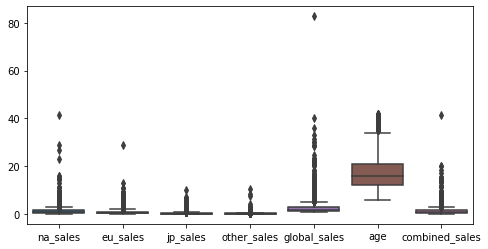

In [81]:
plt.figure(figsize=(8,4))

# Create boxplots for all quantitative values.
sns.boxplot(data=games.drop(columns=['year','rank']))
plt.show()

# Takeaways
* All columns have many outliers. I'm not sure what to do with them at this point.
* I'll leave them in for now and see if they affect my model.

# Split the data

In [82]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(games, test_size=.2, 
                                        random_state=123)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)

print("train observations: ", train.shape[0])
print("validate observations: ", validate.shape[0])
print("test observations: ", test.shape[0])

train observations:  1136
validate observations:  488
test observations:  407


In [83]:
train.shape

(1136, 13)

In [84]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 1428 to 2007
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            488 non-null    int64  
 1   name            488 non-null    object 
 2   platform        488 non-null    object 
 3   year            488 non-null    int64  
 4   genre           488 non-null    object 
 5   publisher       488 non-null    object 
 6   na_sales        488 non-null    float64
 7   eu_sales        488 non-null    float64
 8   jp_sales        488 non-null    float64
 9   other_sales     488 non-null    float64
 10  global_sales    488 non-null    float64
 11  age             488 non-null    int64  
 12  combined_sales  488 non-null    float64
dtypes: float64(6), int64(3), object(4)
memory usage: 53.4+ KB


In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 1733 to 1779
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            407 non-null    int64  
 1   name            407 non-null    object 
 2   platform        407 non-null    object 
 3   year            407 non-null    int64  
 4   genre           407 non-null    object 
 5   publisher       407 non-null    object 
 6   na_sales        407 non-null    float64
 7   eu_sales        407 non-null    float64
 8   jp_sales        407 non-null    float64
 9   other_sales     407 non-null    float64
 10  global_sales    407 non-null    float64
 11  age             407 non-null    int64  
 12  combined_sales  407 non-null    float64
dtypes: float64(6), int64(3), object(4)
memory usage: 44.5+ KB


In [86]:
train

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales
2030,2032,Shrek 2,GC,2004,Platform,Activision,0.73,0.26,0.01,0.03,1.02,18,0.30
1329,1331,Dragon Quest Monsters: Joker 2,DS,2010,Role-Playing,Square Enix,0.11,0.08,1.24,0.02,1.45,12,1.34
1670,1672,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,1.20,7,0.69
961,963,Sly 2: Band of Thieves,PS2,2004,Platform,Sony Computer Entertainment,0.88,0.69,0.00,0.23,1.81,18,0.92
1228,1230,Dead Space 2,X360,2011,Shooter,Electronic Arts,0.94,0.45,0.00,0.13,1.52,11,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,727,New Super Luigi U,WiiU,2013,Platform,Nintendo,1.27,0.62,0.18,0.16,2.22,9,0.96
1330,1332,Tony Hawk's American Wasteland (Weekly america...,PS2,2005,Sports,Activision,1.38,0.05,0.00,0.02,1.45,17,0.07
1961,1963,Seek and Destroy,PS2,2002,Racing,Play It,0.52,0.40,0.00,0.14,1.06,20,0.54
909,911,Need for Speed Rivals,PS4,2013,Racing,Electronic Arts,0.73,0.91,0.03,0.22,1.89,9,1.16


# Target Variable: 'na_sales'
#### Separate the target variable from the independent variables and drop other unwanted columns.

In [87]:
# Create a dataframe called 'X_train' that drops 'na_sales'(target), 'rank', 'name', and 'global_sales'.
X_train = train.drop(columns=['na_sales','rank','name','global_sales','year'])
X_validate = validate.drop(columns=['na_sales','rank','name','global_sales','year'])
X_test = test.drop(columns=['na_sales','rank','name','global_sales','year'])

In [91]:
# Create variables that hold values for the target.
y_train = train.na_sales
y_validate = validate.na_sales
y_test = test.na_sales

In [92]:
len(y_train), len(y_validate), len(y_test)

(1136, 488, 407)

## Scale data using Min-Max Scaler

In [95]:
# Create two separate dataframes. One for quantitative values and the other for qualitative values.
quantitative_values = X_train.select_dtypes(exclude='object').columns
qualitative_values = X_train.select_dtypes(include='object').columns

In [98]:
quantitative_values ,qualitative_values

(Index(['eu_sales', 'jp_sales', 'other_sales', 'age', 'combined_sales'], dtype='object'),
 Index(['platform', 'genre', 'publisher'], dtype='object'))

In [101]:
X_train[qualitative_values]

,platform,genre,publisher
2030,GC,Platform,Activision
1329,DS,Role-Playing,Square Enix
1670,Wii,Misc,Ubisoft
961,PS2,Platform,Sony Computer Entertainment
1228,X360,Shooter,Electronic Arts
...,...,...,...
725,WiiU,Platform,Nintendo
1330,PS2,Sports,Activision
1961,PS2,Racing,Play It
909,PS4,Racing,Electronic Arts


In [100]:
X_train[quantitative_values]

,eu_sales,jp_sales,other_sales,age,combined_sales
2030,0.26,0.01,0.03,18,0.30
1329,0.08,1.24,0.02,12,1.34
1670,0.59,0.00,0.10,7,0.69
961,0.69,0.00,0.23,18,0.92
1228,0.45,0.00,0.13,11,0.58
...,...,...,...,...,...
725,0.62,0.18,0.16,9,0.96
1330,0.05,0.00,0.02,17,0.07
1961,0.40,0.00,0.14,20,0.54
909,0.91,0.03,0.22,9,1.16


In [108]:
scaler = sklearn.preprocessing.MinMaxScaler()
# We will only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train[quantitative_values])

X_train_scaled = scaler.transform(X_train[quantitative_values])
X_validate_scaled = scaler.transform(X_validate[quantitative_values])
X_test_scaled = scaler.transform(X_test[quantitative_values])

In [124]:
pd.DataFrame(X_train_scaled, columns = [quantitative_values])

In [126]:
X_train[qualitative_values]